### get solar wind parameters at Mercury orbit from Parker Solar Probe data

In [5]:
#because script is not in root directory of package
#mac
sys.path.append('/Users/chris/python/heliocats')
#server
#sys.path.append('/home/cmoestl/pycode/heliocats')



import numpy as np
import scipy.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.dates import  DateFormatter
import seaborn as sns
import astropy
import astropy.constants as const
from sunpy.time import parse_time
import time
import pickle
import sys
import os
import urllib
import json
import importlib
import pandas as pd
import copy
import openpyxl
import h5py
import numba
from numba import jit
import multiprocessing
import heliopy.data.spice as spicedata
import heliopy.spice as spice
import astropy

import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.coordinates
from sunpy.coordinates import frames


from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging

from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

from heliocats import cats as hc
importlib.reload(hc) #reload again while debugging

from heliocats import stats as hs
importlib.reload(hs) #reload again while debugging

#where the in situ data files are located is read 
#from config.py 
import config
importlib.reload(config)
from config import data_path
from config import data_path_ML

filepsp='psp_2018_2019_sceq.p'
[psp,hpsp]=pickle.load(open(data_path+filepsp, "rb" ) )  
print('PSP data loaded')

plt.rcParams["figure.figsize"] = (10,5)
    

PSP data loaded


71.31982304703638 47.762405717399645


Text(0.5, 0, 'AU')

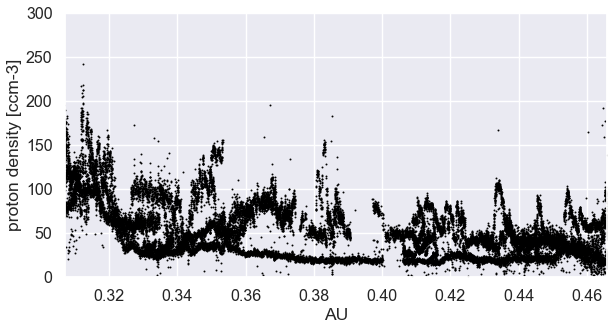

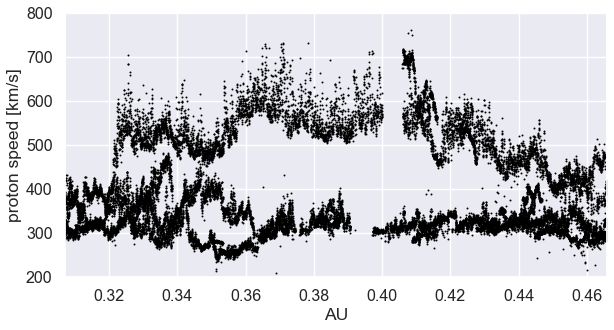

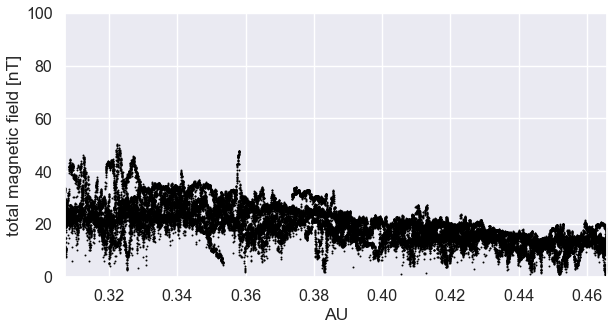

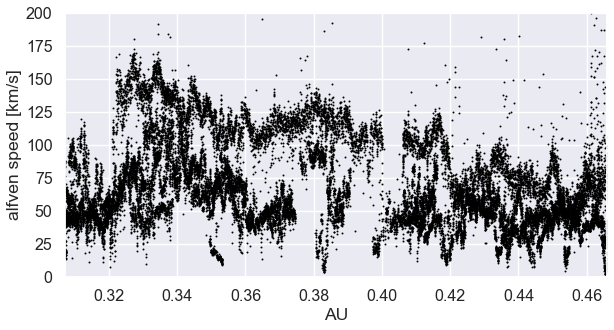

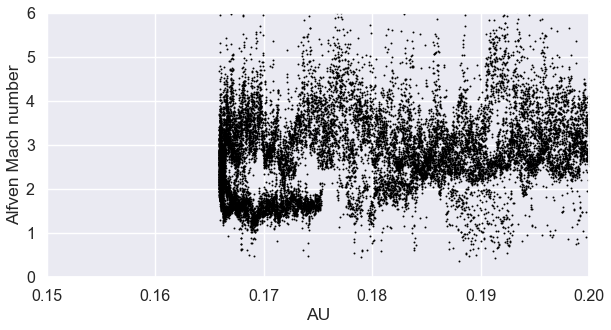

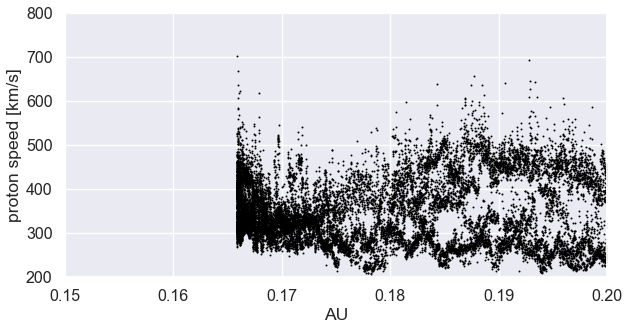

In [8]:
sns.set_context("talk") 
sns.set_style('darkgrid')



plt.figure(1,dpi=70)
plt.plot(psp.r,psp.np,'ok',markersize=1)
#plt.xlim(0.307,0.466)
plt.ylim(0,300)
plt.xlim(0.307,0.466)
plt.ylabel('proton density [ccm-3]')
plt.xlabel('AU')

plt.figure(2,dpi=70)
plt.plot(psp.r,psp.vt,'ok',markersize=1)
plt.xlim(0.307,0.466)
plt.ylim(200,800)
plt.ylabel('proton speed [km/s]')
plt.xlabel('AU')


plt.figure(3,dpi=70)
plt.plot(psp.r,psp.bt,'ok',markersize=1)
plt.xlim(0.307,0.466)
plt.ylim(0,100)
plt.ylabel('total magnetic field [nT]')
plt.xlabel('AU')


#alfven velocity va=B/sqrt(mu0*ni*mi)
from astropy.constants import mu0,m_p

va=(psp.bt*1e-9)/np.sqrt(mu0.value*(psp.np*1e6)*m_p.value)*1e-3

print(np.nanmean(va), np.nanstd(va))


plt.figure(4,dpi=70)
plt.plot(psp.r,va,'ok',markersize=1)
plt.xlim(0.307,0.466)
plt.ylim(0,200)
plt.ylabel('alfven speed [km/s]')
plt.xlabel('AU')



#alfven mach number amn=vp/va

amn=psp.vt/va


plt.figure(5,dpi=70)
plt.plot(psp.r,amn,'ok',markersize=1)
#plt.yscale('log')
plt.xlim(0.15,0.2)
plt.ylim(0,6)
plt.ylabel('Alfven Mach number')
plt.xlabel('AU')



plt.figure(6,dpi=70)
plt.plot(psp.r,psp.vt,'ok',markersize=1)
plt.xlim(0.15,0.2)
plt.ylim(200,800)
plt.ylabel('proton speed [km/s]')
plt.xlabel('AU')



In [ ]:
sns.set_context("talk") 
sns.set_style('darkgrid')



#those are the data points inside Mercurys orbit
m_ind=np.where(np.logical_and(psp.r >0.307,psp.r<0.466))[0]

print('total psp data points',np.size(psp))
print('inside Mercury orbit',np.size(m_ind))

#density
m_ind_notnan=np.where(np.isnan(psp[m_ind].np)==False)[0]
#this is the data for the density inside mercury orbit and not a nan
m_den=psp.np[m_ind][m_ind_notnan]
plt.figure(6,dpi=70)
sns.distplot(m_den)
plt.title('density')
plt.xlabel('Np [ccm-3]')


#same for speed

m_ind_notnan=np.where(np.isnan(psp[m_ind].vt)==False)[0]
m_speed=psp.vt[m_ind][m_ind_notnan]
plt.figure(7,dpi=70)
sns.distplot(m_speed)
plt.title('total speed')
plt.xlabel('Vt [km/s]')


m_ind_notnan=np.where(np.isnan(psp[m_ind].bt)==False)[0]
m_bt=psp.bt[m_ind][m_ind_notnan]
plt.figure(8,dpi=70)
sns.distplot(m_bt)
plt.title('total B')
plt.xlabel('Bt [nT]')




m_ind_notnan=np.where(np.isnan(amn[m_ind])==False)[0]
m_amn=amn[m_ind][m_ind_notnan]
plt.figure(9,dpi=70)
sns.distplot(m_amn,bins=500)
plt.title('Alfven Mach number')
plt.xlim(0,20)
plt.xlabel('M')






**MIT LICENSE**

Copyright 2020, Christian Moestl

Permission is hereby granted, free of charge, to any person obtaining a copy of this 
software and associated documentation files (the "Software"), to deal in the Software
without restriction, including without limitation the rights to use, copy, modify, 
merge, publish, distribute, sublicense, and/or sell copies of the Software, and to 
permit persons to whom the Software is furnished to do so, subject to the following 
conditions:

The above copyright notice and this permission notice shall be included in all copies 
or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, 
INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A
PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT 
HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF 
CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE 
OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

